# Life Expectancy and GDP

We investigate possible relationships between life expectancy and GDP for six countries using data collected by the World Health Organization (WHO) and the World Bank.


## Goals
 - Reviewing how to load, clean, analyze and visualize data. 
 - Answer the main question: Is life expectancy always correlated positively with GDP?
 - Are there any patterns in time? Is the correlation linear for all countries?

Plots of each country's GDP and life expectancy will be produced.

## Loading data

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

We load the data below and print some basic information to understand the data available and reformulate questions if necessary.

In [30]:
data_full = pd.read_csv("all_data.csv")
print(data_full.dtypes)
data_full.rename(columns={'Country':'country','Year':'year','Life expectancy at birth (years)':'life_expectancy','GDP':'gdp'},inplace=True)
print(data_full.columns)
print(data_full.info())
print(data_full.country.unique())
print(data_full.year.unique())

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object
Index(['country', 'year', 'life_expectancy', 'gdp'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          96 non-null     object 
 1   year             96 non-null     int64  
 2   life_expectancy  96 non-null     float64
 3   gdp              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## Initial data exploration

Here we explore the data against time (Years) to see whether there are obvious outliers or obvious patterns.

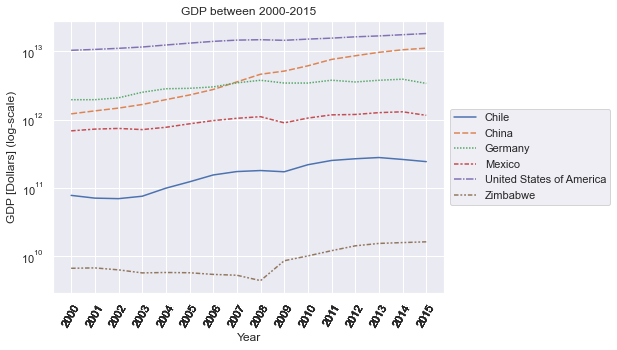

<Figure size 432x288 with 0 Axes>

In [31]:
sns.set(style="darkgrid") 
plt.figure(figsize=(7,5))
country_gdp = pd.pivot_table(data_full, values='gdp', index='year', columns='country')
ax = sns.lineplot(data=country_gdp)
ax.set_xticks(data_full.year)
ax.set_xticklabels(labels=data_full.year,rotation=60,weight='normal')
plt.title('GDP between 2000-2015')
plt.xlabel('Year')
plt.yscale('log')
plt.ylabel('GDP [Dollars] (log-scale)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.clf()

- GDP generally increases in time, with the exception of 2014 where most countries experienced a mild decline or flatting of their growth.
- GDP's are so different, that a log-scale was preferred to be able to gather all countries however, it might be misleading in representing how much more wealthier countries produce compared to countries at the bottom of the graph.

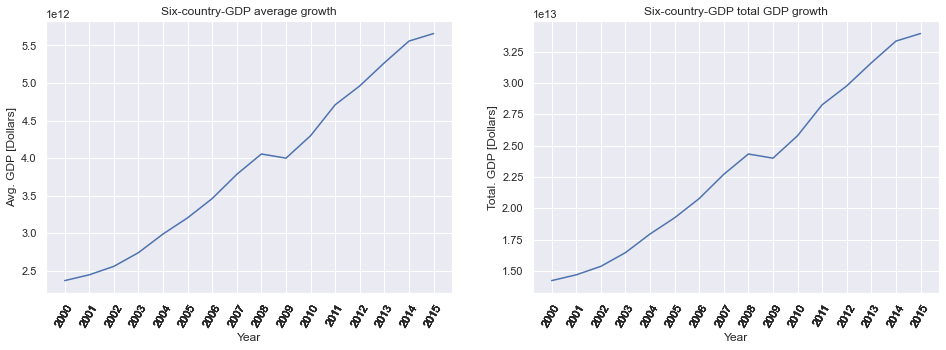

<Figure size 432x288 with 0 Axes>

In [32]:
world_growth_avg = data_full.groupby(['year']).gdp.mean()
world_growth_total = data_full.groupby(['year']).gdp.sum()
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
ax = sns.lineplot(world_growth_avg)
plt.xlabel('Year')
plt.ylabel('Avg. GDP [Dollars]')
plt.title('Six-country-GDP average growth')
ax.set_xticks(data_full.year)
ax.set_xticklabels(labels=data_full.year,rotation=60,weight='normal')

plt.subplot(1,2,2)
ax = sns.lineplot(world_growth_total)
plt.xlabel('Year')
plt.ylabel('Total. GDP [Dollars]')
plt.title('Six-country-GDP total GDP growth')
ax.set_xticks(data_full.year)
ax.set_xticklabels(labels=data_full.year,rotation=60,weight='normal')

plt.show()
plt.clf()

In [33]:
start = world_growth_total.min() 
end = world_growth_total.max()

print(100*end/start)

238.59865291713533


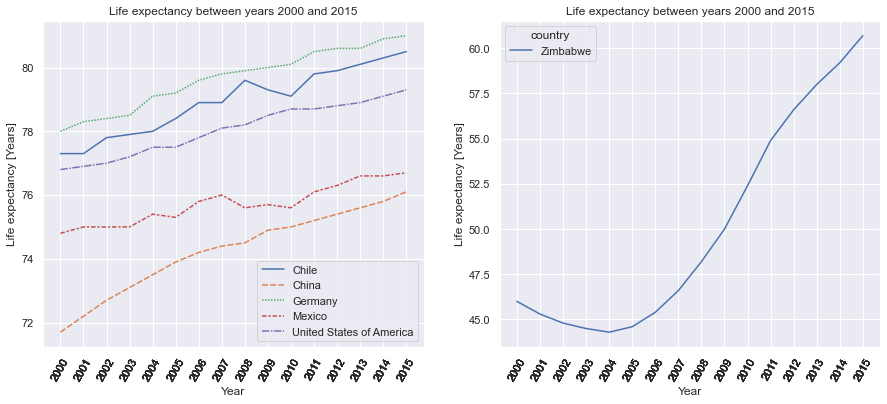

<Figure size 432x288 with 0 Axes>

In [34]:
plt.figure(figsize=(15,6))
country_expectancy = pd.pivot_table(data_full, values='life_expectancy', index='year', columns='country')
plt.subplot(1,2,1)
ax = sns.lineplot(data=country_expectancy.loc[:,country_expectancy.columns != 'Zimbabwe'])
plt.xlabel('Year')
plt.ylabel('Life expectancy [Years]')
ax.set_xticks(data_full.year)
ax.set_xticklabels(labels=data_full.year,rotation=60,weight='normal')
plt.title('Life expectancy between years 2000 and 2015')
plt.legend(loc=4)
plt.subplot(1,2,2)
ax = sns.lineplot(data=country_expectancy.loc[:,country_expectancy.columns == 'Zimbabwe'])
plt.title('Life expectancy between years 2000 and 2015')
plt.xlabel('Year')
plt.ylabel('Life expectancy [Years]')
ax.set_xticks(data_full.year)
ax.set_xticklabels(labels=data_full.year,rotation=60,weight='normal')
plt.show()
plt.clf()


Regarding life expectancy, we find one outlier, corresponding to Zimbabwe which had a very low life expectancy at birth at the beginning of the 2000's but has since improved dramatically. It shows a non-linear correlation. 
Most other countries seem to be experiencing a close to linear improvement of their life expectancy against time, except perhaps China which resembles a mild logarithmic improvement.

## GDP vs Life expectancy

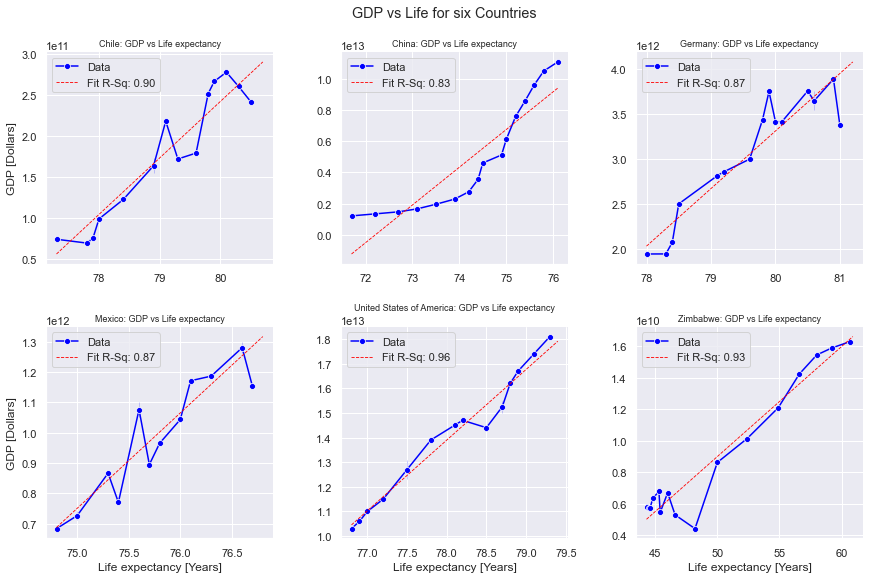

<Figure size 432x288 with 0 Axes>

In [60]:
g = sns.FacetGrid(data_full, col="country", col_wrap=3, sharex=None, sharey=None, height=4)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('GDP vs Life for six Countries')
reg_results = {}
for (country, c_ax) in g.axes_dict.items():
    country_df = data_full[data_full['country']== country]
    sns.lineplot(data= country_df,x="life_expectancy",y="gdp",marker='o', ax=c_ax, color='blue',label='Data')
    model = sm.OLS.from_formula('gdp ~ life_expectancy', data = country_df)
    results = model.fit()
    reg_results[country] = [results.params[0],results.params[1],results.rsquared]
    x_years = np.arange(country_df.life_expectancy.min(), country_df.life_expectancy.max()+.2,.2)
    y_gdp = reg_results[country][1]*x_years + reg_results[country][0]
    sns.lineplot(x=x_years,y=y_gdp, linestyle='--', ax=c_ax, color='red',label='Fit R-Sq: {:.2f}'.format(reg_results[country][2]),linewidth=.85,)


g.add_legend()
g.set_axis_labels('Life expectancy [Years]', 'GDP [Dollars]')
g.set_titles('{col_name}: GDP vs Life expectancy',size=9)
g.figure.subplots_adjust(wspace=.3, hspace=.3)
plt.show()
plt.clf()

### Comparative international behavior

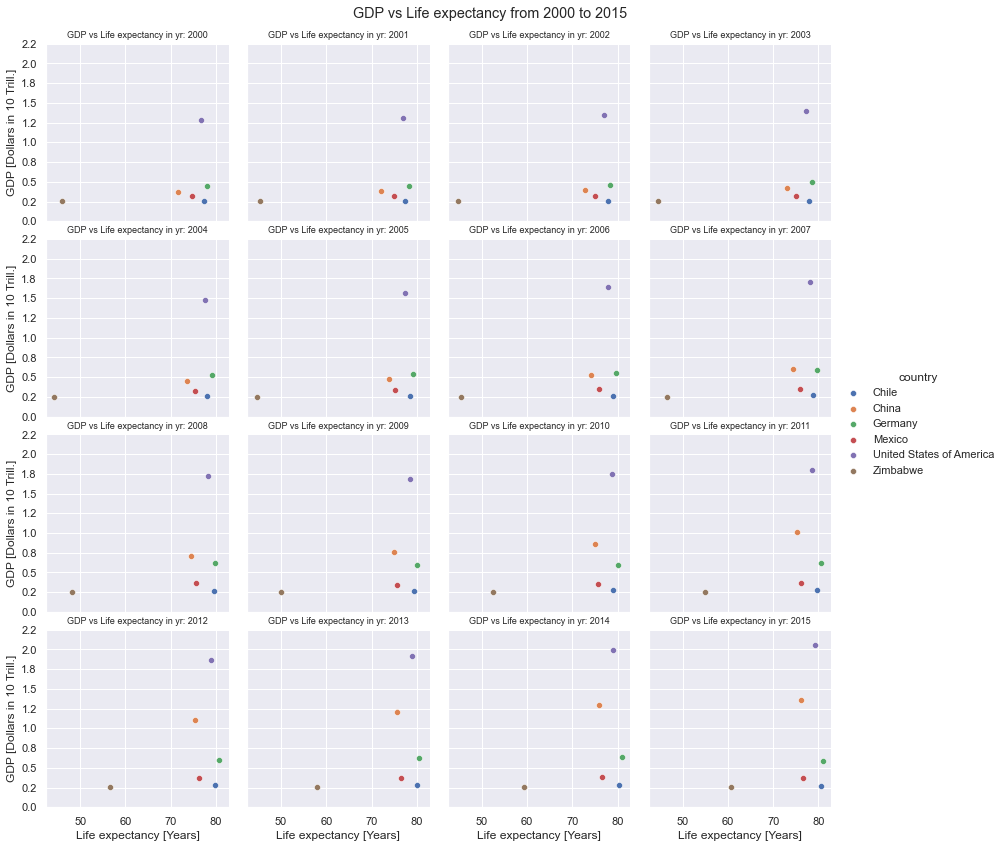

<Figure size 432x288 with 0 Axes>

In [53]:
g = sns.FacetGrid(data_full, col="year", col_wrap=4, sharex=True, sharey=True, hue='country',legend_out=True)
g.fig.subplots_adjust(top=1.2)
g.fig.suptitle('GDP vs Life expectancy from 2000 to 2015')
g.map(sns.scatterplot, "life_expectancy", "gdp")
g.set_axis_labels('Life expectancy [Years]', 'GDP [Dollars in 10 Trill.]')
g.set_titles('GDP vs Life expectancy in yr: {col_name}',size=9)
g.add_legend()
g.figure.subplots_adjust(wspace=.1, hspace=.1)
yticks = [n*2500000000000 for n in range(10)]
ylabels = ['{:,.1f}'.format(y/float(10000000000000)) for y in yticks]
g.set_yticklabels(ylabels)
plt.show()
plt.clf()

In [49]:
cluster = ["Germany","Mexico","Chile"]
for c in cluster:
    max_gdp = data_full[data_full.country == c].gdp.max()
    min_gdp = data_full[data_full.country == c].gdp.min()
    print(c + ': ' + '{:.1f} %'.format( 100*(max_gdp/min_gdp)))


Germany: 199.5 %
Mexico: 189.9 %
Chile: 399.2 %


In [46]:
start = data_full[(data_full.country == 'Zimbabwe') & (data_full.year==2000)].life_expectancy.sum()
end = data_full[(data_full.country == 'Zimbabwe') & (data_full.year==2015)].life_expectancy.sum()

print(end/start - 1 )

0.3195652173913044


# Summary and conclusions

We have analyzed the data from the World Health Organization and the World Bank regarding the life expectancy (LE) at birth and the Gross Domestic Product (GDP) of these six countries: Chile, China, Germany, Mexico, United States of America and Zimbabwe.

The data available contains the records of LE in years and GDP in dollars for the years between 2000 and (including) 2015. The data is already formatted correctly and clean, so there was no need to replace or discard missing data. 

The first section studies global trends and the LE and GDP data independently from one another and separated by country. 
The second section elaborates on the correlation existing between GDP and LE. 

## Global and national trends

### GDP

The first figure shows the evolution of the GDP of these six countries as a function of time for the period 2000 - 2015. We observe that differences in GDP are well above an order of magnitude, so we require a logarithmic scale for the 'y' axis if we want to get a picture of these countries at a glance. From the countries considered USA leads in GDP through the fifteen years with a GDP between 10-20 Trillion Dollars. The bottom of the list is occupied by Zimbabwe which starts in 2000 with 6 Billion dollars and ends with 16 Billion dollars. Most countries follow a linear improvement of their GDP in time, except for China which starts with a GDP of 1.21 Trillion dollars but ends above the 11 Trillion dollars. All other countries show a steady linear increase of GDP without changing in order of magnitude, specifically, Chile, Mexico and Germany almost doubled their GDP in these period.

The global trend is of growth. The plot titled "Six-country-GDP average growth" shows how the average GDP of these six countries is definitely increasing. This is mostly caused by countries like the USA and China which dominate the average. The plot simply replicates their behavior. Nonetheless, all countries studied experienced overall GDP growth in this period. The accumulated GDP for these six countries more than doubled (240%) as can be deduced from the figure titled 'Six-country-GDP total GDP growth'. 

### Life expectancy (LE)

The next two figures examine the variable LE against time. They are titled 'Life expectancy between years 2000 and 2015' and depict the evolution of the average life expectancy at birthday for Chile, China, Germany, Mexico and United States of America which seem to be clustered around 75 years (left plot) and separately for the outlier Zimbabwe (right plot). Zimbabwe's case is exceptional according to this data, the country begins the 2000s with an LE of 46.0 years. It suffers a decline in the follow-up but has evolved all the way up to 60.7 years in 2015. Although it remains the country with the shortest LE of this group, it has been the one with the largest percentage increase, namely: 32 %.
All other countries considered, start above 70 years and end this period having reached almost 80 years, only Chile and Germany surpass the 80 years of LE. China presents again some peculiar evolution, where its LE evolution does not appear to be linear but somewhat slower as a function on time, ending at the bottom of the plot (excluding Zimbabwe).


## GDP vs LE



GDP and life expectancy are clearly related almost linearly for every country. In the year interval 2000 - 2015 available, these six countries have experienced an improvement in their life expectancy whenever there was an improvement in their GDP, except for very few unusual years, this can be observed in the plot grid titled 'GDP vs Life for six Countries' . China's development shows a faster than linear growth after it reached 20 Trillion dollars in GDP, and presents the worst linear fit of these six countries. The R-squared or Pearson correlation is above 0.8 for all countries showing how the relation between GDP and LE in the period considered can said to be linear. The country with the highest linear correlation is the USA with R-squared of 0.96.

The plot grid titled 'GDP vs Life expectancy from 2000 to 2015' shows the comparative evolution of the different countries in relation to their GDP. In this grid we can witness different behaviors thanks to the axes scales kept constant throughout the grid. We observe the following:
 
- USA has the highest GDP of the group in 2000 and through the 15 years that follow, it almost managed to double its GDP.
- China was together with the cluster of countries in the lower right corner in year 2000, having the lowest life expectancy after Zimbabwe and less than half of the GDP of the USA. It has since then experienced an almost vertical growth in this plane, where its GDP has increased by roughly 9 times, but its life expectancy has barely changed (comparatively) and still not reaching 80 years.
- Zimbabwe had the lowest GDP and life expectancy of this group in 2000 and has seen a horizontal evolution, in the sense that its GDP has remain unchanged, but its life expectancy has gone from slightly above 40 years of age to slightly above 60. This, even after suffering a decline in the period 2005 - 2008.
- Countries such as Germany, Mexico and Chile have enjoyed a relatively high life expectancy already above 75 years, which has improved steadily towards 80 along as their GDP's which have almost duplicated for Germany and Mexico almost quadrupled for Chile, when comparing the year 2000 to 2015.

We have verified that the relation between GDP and LE is linear to a high degree for all the six countries. Different countries however have different slopes and evolve at different rates, however even in the cases where GDP and LE have not evolved linearly on its own, the relation among the two seems to remain mostly linear. 